Import required libaries for the project

In [4]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

Then we insert all the required connection properties

In [5]:
conn = pyodbc.connect('Driver={SQL Server};' # This is what server type we are connecting to
                      'Server=DESKTOP-3G2D9G9\SERVER1;' # This is the location and name of the server, same as what we use to connect using SSMS
                      'Database=AdventureWorks2019;' # This is which database we are connecting to within the selected server
                      'Trusted_Connection=yes;') # This allows us to forgo entering a trusted key or password because we are the admin of this computer and the...
                    # ... database has been configured to allow this user when we set it up. 

Now we create the cursor for  establishing a Database connection

In [6]:
cursor = conn.cursor()

Here we define what query we want executed in the database,I will be looking at the view table Sales.vStoreWithDemographics, which contains:
-  store’s opening year (YearOpened) 
-  annual revenue (AnnualRevenue) 
 From 2019  to yearopeaned column to find TradingDurationYears.
then i will make the relationship between TradingDurationyears and  Annual revenue  and also order by TradingDurationYears
-i have also used INNER JOIN to see whether any other factor affect my result so i will be using CountryRegionName column from Sales.vstoreWithAddresses table to compare my output.

In [47]:
query1 = '''
SELECT  
      SSWD.BusinessEntityID, 
	  SSWD.Name AS StoreName,
	  SSWD.AnnualSales,
	  SSWD.YearOpened,
	  SSWD.NumberEmployees,
	  SSWD.AnnualRevenue,
	  (2019-SSWD.YearOpened) AS TradingDurationYears,
	  SSWA.CountryRegionName
FROM Sales.vStoreWithDemographics AS SSWD
INNER JOIN Sales.vStoreWithAddresses AS SSWA 
      ON SSWD.BusinessEntityID= SSWA.BusinessEntityID
ORDER BY  TradingDurationYears desc;
'''
query2='''Select Avg([SalesYTD])As Avg_Sales,[CountryRegionCode]
FROM [Sales].[SalesTerritory]
GROUP BY CountryRegionCode,SalesYTD'''


Here we assign the resulting table returned from the database as a variable 'Store_Trading_Revenuedata'. 
This is also where our connection actually runs using the defined properties and query above

In [48]:
Store_Trading_Revenuedata1 = pd.read_sql(query1,conn)

C:\Users\Generation UK&I\AppData\Local\Temp\ipykernel_22180\3032286612.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Store_Trading_Revenuedata1 = pd.read_sql(query1,conn)


In [103]:
Store_Trading_Revenuedata2 = pd.read_sql(query2,conn)

C:\Users\Generation UK&I\AppData\Local\Temp\ipykernel_22180\2010576943.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Store_Trading_Revenuedata2 = pd.read_sql(query2,conn)


Let's get a preview of what our data looks like:

In [10]:
print(Store_Trading_Revenuedata1.head())

   BusinessEntityID                 StoreName  AnnualSales  YearOpened  \
0               570  Professional Cycle Store     300000.0        1970   
1              1082         First Cycle Store     300000.0        1970   
2              1266  Reasonable Bicycle Sales     300000.0        1970   
3              1242          Field Trip Store     300000.0        1970   
4              1102    Leisure Clearing House     800000.0        1970   

   NumberEmployees  AnnualRevenue  TradingDurationYears CountryRegionName  
0                2        30000.0                    49     United States  
1                6        30000.0                    49     United States  
2                6        30000.0                    49     United States  
3                2        30000.0                    49     United States  
4               10        80000.0                    49    United Kingdom  


Then i create a BAR plot using two of the fields returned from the database namely 'TradingDuarationYears' and 'AnnualRevenue' in my 'x' and 'y' plot 

Using Numpy i have calculated correlation and standard Deviation  for the same Barplot

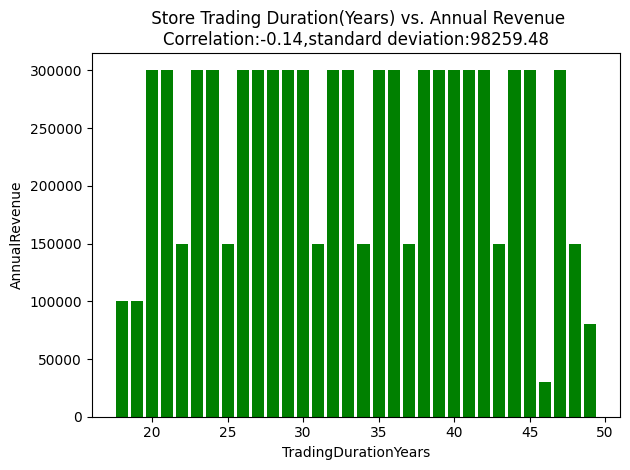

In [133]:
#Import Numpy for Calculating Co-relation and Standard Deviation 
import numpy as np
# Create DataFrame using  pandas with  Store_Trading_revenuedata  as input which has query data
df=pd.DataFrame(Store_Trading_Revenuedata1)
# Calculate Correlation Co-effiecent
correlation_coefficient=np.corrcoef(df['TradingDurationYears'],df['AnnualRevenue'])[0,1]
# Calculate standard deviation
std_deviation= np.std(df['AnnualRevenue'])
# plot a Bar plot
plt.bar(df['TradingDurationYears'],df['AnnualRevenue'],color='green',alpha=0.6)
plt.xlabel('TradingDurationYears')
plt.ylabel('AnnualRevenue')
plt.title( f' Store Trading Duration(Years) vs. Annual Revenue\nCorrelation:{correlation_coefficient:.2f},standard deviation:{std_deviation:.2f}')
plt.tight_layout()
plt.show()



Here i used linear regression function of scipy.stats that that models the relationship between two variable by plotting linear equation or trend line with co-relation and standard deviation

Here i have used scatter plot to show the trend line with the standard-Deviation and correlation

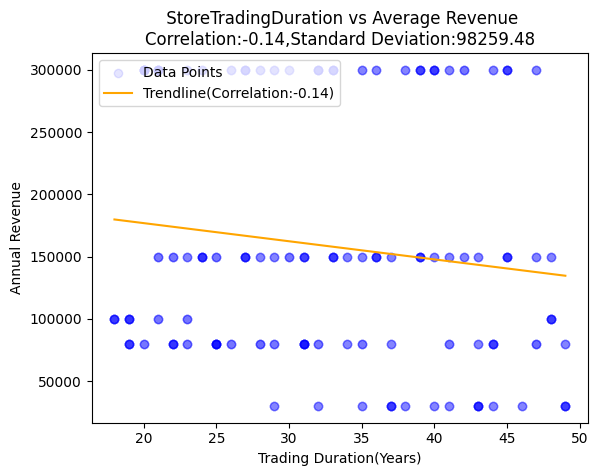

In [42]:
#Import Numpy for Calculating Co-relation and Standard Deviation 
#Import linregress which is a function of scipy.stats for linear regression that models the relationship between two variable by plotting linear equation

import numpy as np
from scipy.stats import linregress

#Create a DataFrame to store Queryoutput
df=pd.DataFrame(Store_Trading_Revenuedata1)

#Extract the data as arrays
x= df['TradingDurationYears'].values
y= df['AnnualRevenue'].values

#Calculate the linear regression line between  two set of data(x and y)
slope,intercept, _, _, _ =linregress(x,y)
trendline = slope * x + intercept

# Calculate correlation coefficient
correlation_coefficient= np.corrcoef(x,y)[0,1]

# Calculate  standard deviation
std_deviation= np.std(y)

#Create a scatter plot

plt.scatter(x,y,color='blue',label='Data Points',alpha=0.1)
plt.xlabel('Trading Duration(Years)')  
plt.ylabel('Annual Revenue')

#Plot the trendline
plt.plot(x,trendline , color ='orange' , label =f'Trendline(Correlation:{correlation_coefficient:.2f})')

#Add  a Header title and legend
plt.title( f' StoreTradingDuration vs Average Revenue\nCorrelation:{correlation_coefficient:.2f},Standard Deviation:{std_deviation:.2f}')
plt.legend(loc='upper left')
plt.show()

Summary :Here i got a  Negative correlation  between the Trading Duration and with Revenue which indicates As trading duration increases,annual revenue tends to decrease slightly and viceversa which can be due to:
* country economic conditions
* Customer preferences 
* Business strategies  
whereas positive standard deviation  for annual revenue indicates significant amount of variability or dispersion in annual revenue among the businesses  being analyzed some business have much higher or lower revenue figures 

so to further check whether country economic condition affect the trading duration and Annual revenue let's compare with  each country 

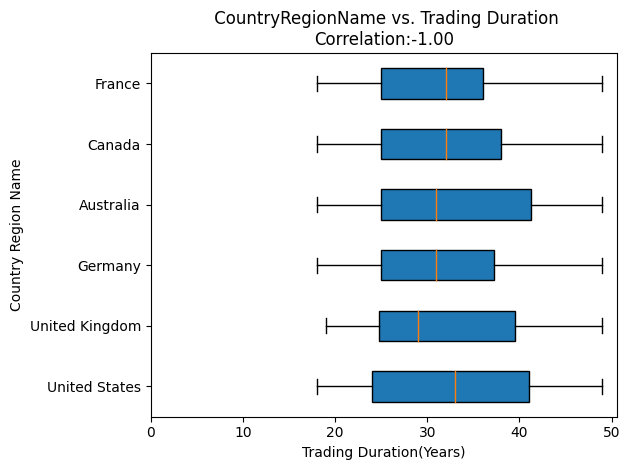

In [187]:
#Import Numpy for Calculating Co-relation and Standard Deviation 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
#Creating DataFrame to store the Query Output
df=pd.DataFrame(Store_Trading_Revenuedata1)

# Calculate Correlation Co-effiecent

correlation_coefficient=np.corrcoef(df['TradingDurationYears'],df['CountryRegionName'].index,)[0,1]
# plot a box plot to view Country region and Trading Duration

plt.boxplot([df[df['CountryRegionName']==region]['TradingDurationYears'] for region in df['CountryRegionName'].unique()],
           labels=df['CountryRegionName'].unique(),patch_artist=True,vert=False)

plt.xlabel('Trading Duration(Years)')
plt.ylabel('Country Region Name')
plt.title(f' CountryRegionName vs. Trading Duration\nCorrelation:{correlation_coefficient:.2f}')
plt.xlim(0)

plt.tight_layout()
plt.show()

So Here i  used box plot and got the slightly negative correlation which shows weak relationship between the country and trading duration means 
* countries have mix of older and newer businesses and the indicate a compitative landscape where only established store have stronghold and some country may be affected by Revenue so to further continuing my survey to see country with Annual revenue.

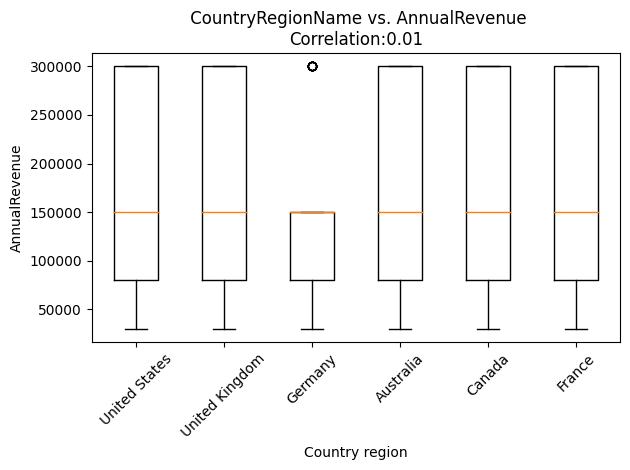

In [131]:
#Import Numpy for Calculating Co-relation and Standard Deviation 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
#Creating DataFrame to store the Query Output
df=pd.DataFrame(Store_Trading_Revenuedata1)

# Calculate Correlation Co-effiecent
correlation_coefficient=np.corrcoef(df['AnnualRevenue'],df['CountryRegionName'].factorize()[0])[0,1]
#plot a box plot to view Country region and Annual revenue
plt.boxplot([df[df['CountryRegionName']==region] ['AnnualRevenue']for region in df['CountryRegionName'].unique()],
          labels=df['CountryRegionName'].unique())
plt.xlabel('Country region')
plt.ylabel('AnnualRevenue')
plt.title(f' CountryRegionName vs. AnnualRevenue\nCorrelation:{correlation_coefficient:.2f}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here we can see  a positive correlation between countryregion and Annual revenue this conclude despite being weak relationship with trading duration some countries still have good annual revenue which means certain countries generate higher revenue for business compared to others.
-As country sales play a vital role in Annual revenue so lets see annual sales with  individual countryRegion

i created a new query to find the average sales with CountryRegionCode

In [104]:
print(Store_Trading_Revenuedata2.head())

      Avg_Sales CountryRegionCode
0  2.402177e+06                US
1  2.538667e+06                US
2  3.072175e+06                US
3  3.805202e+06                DE
4  4.772398e+06                FR


Using a box plot to show more details for countryRegioncode with Avg sales,i got  a positive correlation between them that means the countries  have good sales records 

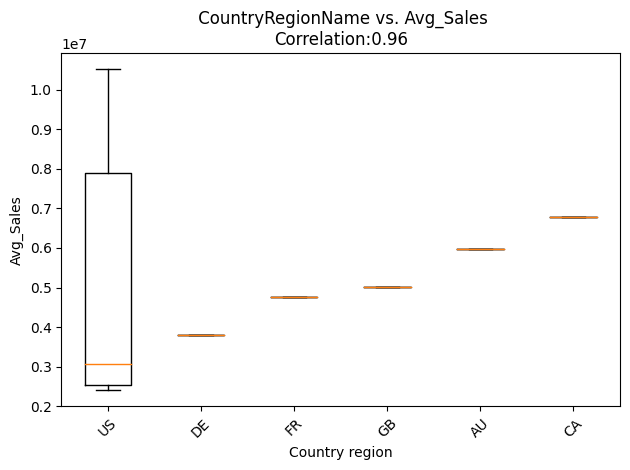

In [127]:
#Import Numpy for Calculating Co-relation and Standard Deviation 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
#Creating DataFrame to store the Query Output
df=pd.DataFrame(Store_Trading_Revenuedata2)

# Calculate Correlation Co-effiecent
correlation_coefficient=np.corrcoef(df['CountryRegionCode'].index,df['Avg_Sales'])[0,1]
#Creating a Box plot
plt.boxplot([df[df['CountryRegionCode']==region] ['Avg_Sales']for region in df['CountryRegionCode'].unique()],
          labels=df['CountryRegionCode'].unique())
plt.xlabel('Country region')
plt.ylabel('Avg_Sales')
plt.title(f' CountryRegionName vs. Avg_Sales\nCorrelation:{correlation_coefficient:.2f}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Also used a Bar plot to show more details

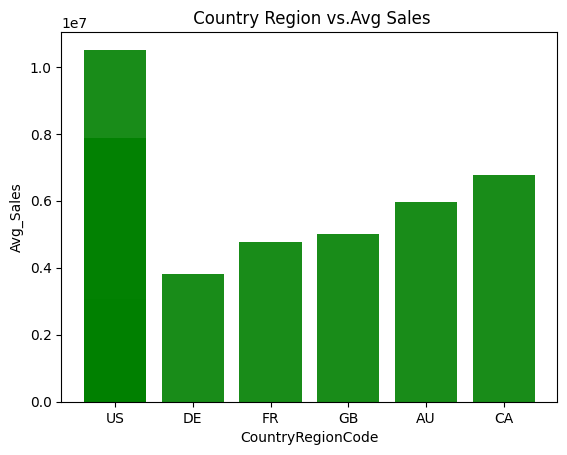

In [162]:
df=pd.DataFrame(Store_Trading_Revenuedata2)
plt.bar(df['CountryRegionCode'],df['Avg_Sales'],color='green',alpha=0.9)
plt.xlabel('CountryRegionCode')
plt.ylabel('Avg_Sales')
plt.title(' Country Region vs.Avg Sales')
plt.show()

Here it shows countries like US ,Canada,Australia have higher sales value so contributing to an higher revenue.  

Conclusion-As the TradingDuration shows negative correlation with Annual revenue where when compared to some countries we did find some countries have high revenue and higher sales that shows might be some store even though have longer  duration might be they dont adapted to evolving customer needs or trends or still follow outdated business models  which hinder revenue growth so long duration trading business needs to adapt to technological advancement,regulatory changes or economic shifts to attract  new customers and generate higher revenue.

To check the more depth into relationship between Tradingduartion and annual revenue lets  check into the relationship between number of employee with tradingduration  and annual revenue 

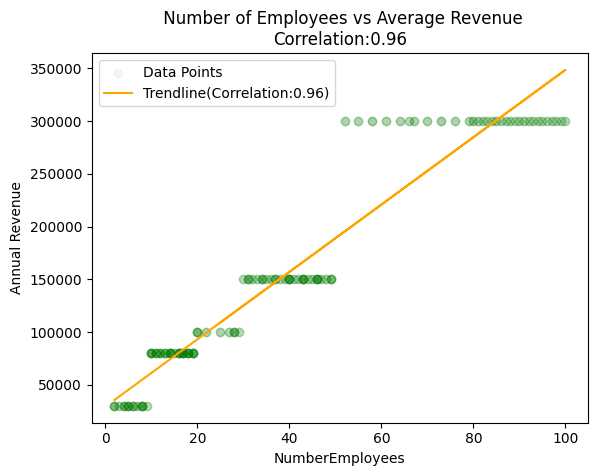

In [158]:
#Import Numpy for Calculating Co-relation and Standard Deviation 
#Import linregress which is a function of scipy.stats for linear regression that models the relationship between two variable by plotting linear equation

import numpy as np
from scipy.stats import linregress

#Create a DataFrame to store Queryoutput
df=pd.DataFrame(Store_Trading_Revenuedata1)

#Extract the data as arrays
x= df['NumberEmployees'].values
y= df['AnnualRevenue'].values

#Calculate the linear regression line between  two set of data(x and y)
slope,intercept, _, _, _ =linregress(x,y)
trendline = slope * x + intercept

# Calculate correlation coefficient
correlation_coefficient= np.corrcoef(x,y)[0,1]

#Create a scatter plot

plt.scatter(x,y,color='green',label='Data Points',alpha=0.05)
plt.xlabel('NumberEmployees')  
plt.ylabel('Annual Revenue')

#Plot the trendline
plt.plot(x,trendline , color ='orange' , label =f'Trendline(Correlation:{correlation_coefficient:.2f})')

#Add  a Header title and legend
plt.title( f' Number of Employees vs Average Revenue\nCorrelation:{correlation_coefficient:.2f}')
plt.legend(loc='upper left')
plt.show()

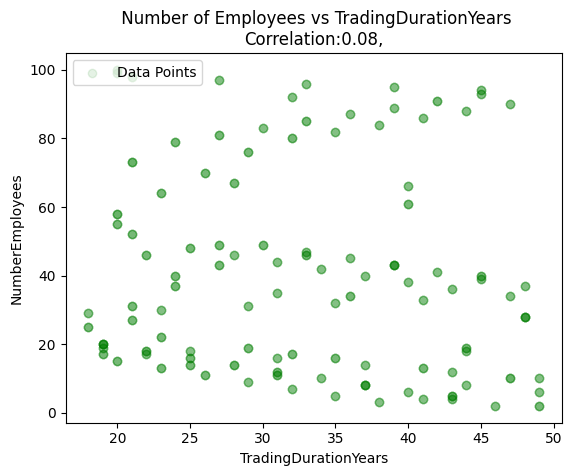

In [160]:
#Import Numpy for Calculating Co-relation and Standard Deviation 
#Import linregress which is a function of scipy.stats for linear regression that models the relationship between two variable by plotting linear equation

import numpy as np
from scipy.stats import linregress

#Create a DataFrame to store Queryoutput
df=pd.DataFrame(Store_Trading_Revenuedata1)

#Extract the data as arrays
x= df['TradingDurationYears'].values
y= df['NumberEmployees'].values

#Calculate the linear regression line between  two set of data(x and y)
slope,intercept, _, _, _ =linregress(y,x)
trendline = slope * x + intercept

# Calculate correlation coefficient
correlation_coefficient=np.corrcoef(df['TradingDurationYears'].index,df['NumberEmployees'],)[0,1]

#plot scatter plot to show  output between NumberEmployees and TradingDuration
plt.scatter(x,y,color='green',label='Data Points',alpha=0.1)
plt.ylabel('NumberEmployees')  
plt.xlabel('TradingDurationYears')

#Plot the trendline
#plt.plot(x,trendline , color ='orange' , label =f'Trendline(Correlation:{correlation_coefficient:.2f})')

#Add  a Header title and legend
plt.title( f' Number of Employees vs TradingDurationYears\nCorrelation:{correlation_coefficient:.2f},')
plt.legend(loc='upper left')
plt.show()

 Even though there is no relation here between number of employee and trading duration but we can see The graphs shows  positive relationship   between number of employees and Annual revenue means good economic growth,greater customer satisfaction  and skilled workforce which increase in revenue

Conclusion-As the TradingDuration shows negative corelation with Annual revenue where when compared to some countries we did find some countries have high revenue and higher sales that shows might be some store even though have longer  duration might be they dont adapted to evolving customer needs or trends or still follow outdated business models  which hinder revenue growth so long duration trading business needs to adapt to technological advancement,regulatory changes or economic shifts to attract  new customers and generate higher revenue.